In [2]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [4]:
df=pd.read_csv("/content/VALENCIA_LIMPIO.csv")
df.shape

(2298, 79)

In [5]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
df.select_dtypes(include=['number']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'availability_eoy', 'number_of_reviews_ly',
       'estimated_occupancy_l365d', 'estimated_revenue_l365d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calcu

Host response rate

In [10]:
#CORRELACIÓN LINEAL
# Clean the 'host_response_rate' column
df['host_response_rate'] = df['host_response_rate'].fillna('0%').astype(str).str.replace('%', '', regex=False).astype(float) / 100

# Clean the 'price' column
df['price'] = df['price'].astype(str).str.replace('[$,]', '', regex=True).astype(float)

R2 = abs(df["host_response_rate"].corr(df["price"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.20308370225339883)

MODELO1 = FUNCIÓN POLINOMIAL INVERSA

/tmp/ipython-input-3438913568.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-3438913568.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red") # Note: The label description doesn't match the function being used. I'll keep it as is for now.


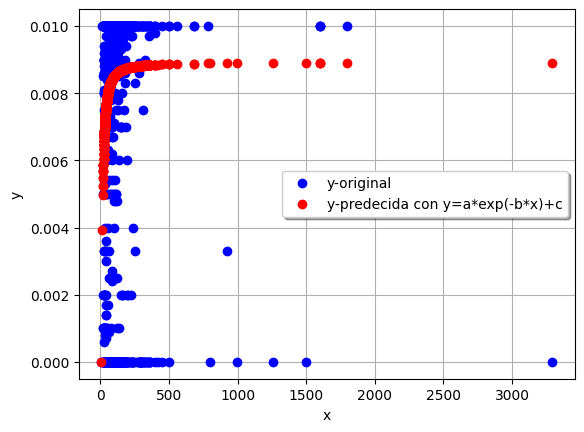

0.03522092007984068
0.18767237431183278


In [14]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['price']]
Var_Dep= df['host_response_rate']

# Remove rows with NaN in either 'price' or 'host_response_rate'
df_cleaned = df.dropna(subset=['price', 'host_response_rate'])

x = df_cleaned[['price']]
y = df_cleaned['host_response_rate']

def func(x, a, b, c):
    return a * x**b + c

# Provide an initial guess for the parameters (a, b, c) and increase maxfev
initial_guess = [1, -0.5, 0.5]  # Example initial guess
parametros, covs = curve_fit(func, x.squeeze(), y, p0=initial_guess, maxfev=5000) # Use squeeze to convert DataFrame to Series
y_pred = func(x.squeeze(), *parametros) # Use squeeze to convert DataFrame to Series
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 1 a tus límites (assuming host_response_rate is between 0 and 1)


plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*exp(-b*x)+c", color= "red") # Note: The label description doesn't match the function being used. I'll keep it as is for now.
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_HOSTRESPONSERATE = abs(r2_score(y, y_pred))
R_HOSTRESPONSERATE = np.sqrt(R2_HOSTRESPONSERATE)
print(R2_HOSTRESPONSERATE)
print(R_HOSTRESPONSERATE)

MODELO2 = FUNCIÓN CUADRÁTICA

/tmp/ipython-input-1669913793.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1669913793.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*x**2 + b*x + c", color= "red")


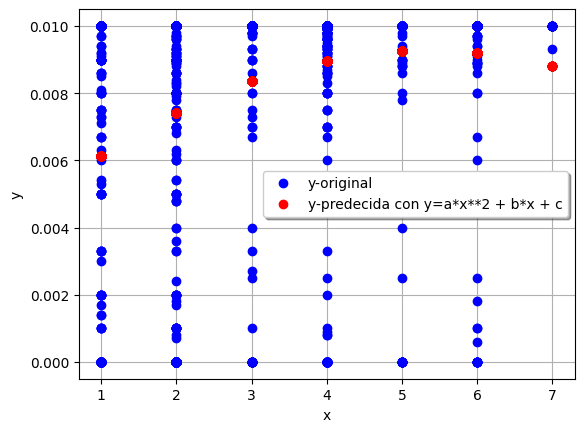

0.08029762012553132
0.28336834707767083


In [15]:
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['accommodates']]
Var_Dep= df['host_response_rate']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a*x**2 + b*x + c
parametros, covs = curve_fit(func, df['accommodates'], df['host_response_rate'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

In [16]:
resultados = pd.DataFrame({
    "Modelo": ["Host Response Rate: Lineal", "Host Response Rate: Función Polinomial Inversa", "Host Response Rate: Función Cuadrática",],
    "R2": [R2, R2_HOSTRESPONSERATE, R21],
    "Correlación (r)": [R, R_HOSTRESPONSERATE, R1]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Response Rate: Lineal,0.041243,0.203084
1,Host Response Rate: Función Polinomial Inversa,0.035221,0.187672
2,Host Response Rate: Función Cuadrática,0.080298,0.283368


2. HOST ACCEPTANCE RATE

In [18]:
#CORRELACIÓN LINEAL
# Clean the 'host_acceptance_rate' column
df['host_acceptance_rate'] = df['host_acceptance_rate'].fillna('0%').astype(str).str.replace('%', '', regex=False).astype(float) / 100

R2 = abs(df["beds"].corr(df["host_acceptance_rate"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.35191680474335457)

/tmp/ipython-input-1260320717.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1260320717.py:24: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=1/(a*x)", color= "red")


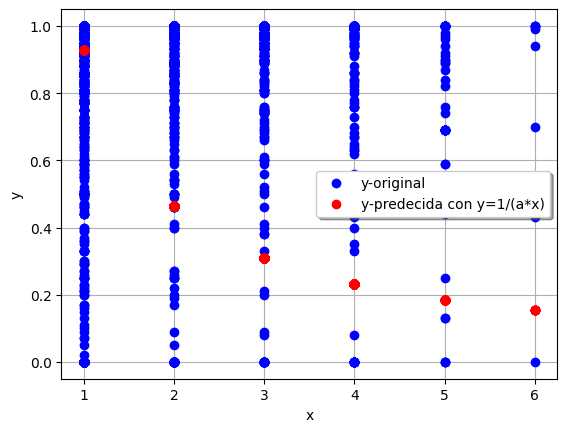

1.1851937404407775
1.0886660371485728


In [21]:
#MODELO 1 =  FUNCIÓN INVERSA
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['beds']]
Var_Dep= df['host_acceptance_rate']

# Remove rows with NaN in either 'beds' or 'host_acceptance_rate', and remove rows where 'beds' is 0
df_cleaned = df.dropna(subset=['beds', 'host_acceptance_rate'])
df_cleaned = df_cleaned[df_cleaned['beds'] != 0]


x = df_cleaned[['beds']]
y = df_cleaned['host_acceptance_rate']

def func(x, a):
    return 1/(a*x)

# Use 'beds' for curve fitting as well
parametros, covs = curve_fit(func, df_cleaned['beds'], df_cleaned['host_acceptance_rate'])

y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=1/(a*x)", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

/tmp/ipython-input-2225612029.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-2225612029.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")


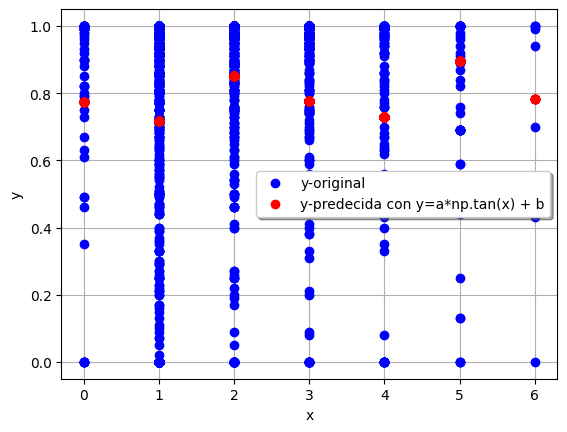

0.031509476154925276
0.17750908752772426


In [24]:
#MODELO 2 = FUNCIÓN TANGENCIAL
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['beds']]
Var_Dep= df['host_acceptance_rate']

# Remove rows with NaN in either 'beds' or 'host_acceptance_rate'
df_cleaned = df.dropna(subset=['beds', 'host_acceptance_rate'])

x = df_cleaned[['beds']]
y = df_cleaned['host_acceptance_rate']

def func(x, a, b):
    return a*np.tan(x) + b

parametros, covs = curve_fit(func, df_cleaned['beds'], df_cleaned['host_acceptance_rate'], maxfev=5000)
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_HOST_ACCEPTANCE_RATE = abs(r2_score(y, y_pred))
R_HOST_ACCEPTANCE_RATE = np.sqrt(R2_HOST_ACCEPTANCE_RATE)
print(R2_HOST_ACCEPTANCE_RATE)
print(R_HOST_ACCEPTANCE_RATE)

In [25]:
resultados = pd.DataFrame({
    "Modelo": ["Host Acceptance Rate: Lineal", "Host Acceptance Rate: Función Inversa", "Host Acceptance Rate: Función Tangencial",],
    "R2": [R2, R21, R2_HOST_ACCEPTANCE_RATE],
    "Correlación (r)": [R, R1, R_HOST_ACCEPTANCE_RATE]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Acceptance Rate: Lineal,0.123845,0.351917
1,Host Acceptance Rate: Función Inversa,1.185194,1.088666
2,Host Acceptance Rate: Función Tangencial,0.031509,0.177509


3. HOST TOTAL LISTINGS COUNT

In [26]:
#CORRELACIÓN LINEAL
R2 = abs(df["host_total_listings_count"].corr(df["bathrooms"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.02646081560218884)

/tmp/ipython-input-2859788480.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-2859788480.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.log(x) + b", color= "red")


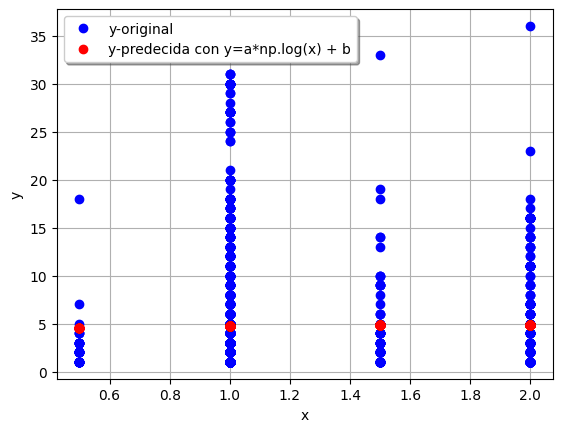

0.00014214859742733843
0.011922608667038368


In [28]:
#MODELO 1
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bathrooms']]
Var_Dep= df['host_total_listings_count']

# Remove rows with NaN in either 'bathrooms' or 'host_total_listings_count', and remove rows where 'bathrooms' is 0
df_cleaned = df.dropna(subset=['bathrooms', 'host_total_listings_count'])
df_cleaned = df_cleaned[df_cleaned['bathrooms'] != 0]

x = df_cleaned[['bathrooms']]
y = df_cleaned['host_total_listings_count']

def func(x, a, b):
    return a*np.log(x) + b

parametros, covs = curve_fit(func, df_cleaned['bathrooms'], df_cleaned['host_total_listings_count'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.log(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

/tmp/ipython-input-744467858.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-744467858.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=1/a*x**4", color= "red")


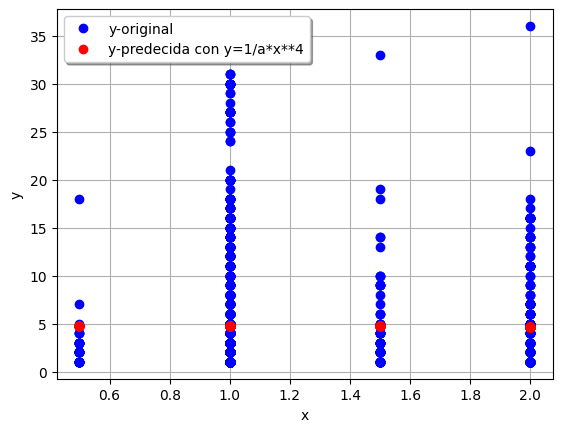

4.025513792438318e-05
0.006344693682470666


In [30]:
#MODELO 2 : POLINOMIO DE GRADO 4
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['bathrooms']]
Var_Dep= df['host_total_listings_count']

# Remove rows with NaN in either 'bathrooms' or 'host_total_listings_count'
df_cleaned = df.dropna(subset=['bathrooms', 'host_total_listings_count'])

x = df_cleaned[['bathrooms']]
y = df_cleaned['host_total_listings_count']

def func(x, a, b):
    return a*x**4 + b

parametros, covs = curve_fit(func, df_cleaned['bathrooms'], df_cleaned['host_total_listings_count'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=1/a*x**4", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_HOSTTOTALLISTINGCOUNT = abs(r2_score(y, y_pred))
R_HOSTTOTALLISTINGCOUNT = np.sqrt(R2_HOSTTOTALLISTINGCOUNT)
print(R2_HOSTTOTALLISTINGCOUNT)
print(R_HOSTTOTALLISTINGCOUNT)

In [31]:
resultados = pd.DataFrame({
    "Modelo": ["Host Total Listings Count: Lineal", "Host Total Listings Count: Función Inversa", "Host Total Listings Count: Polinomio de grado 4",],
    "R2": [R2, R21, R2_HOSTTOTALLISTINGCOUNT ],
    "Correlación (r)": [R, R1, R_HOSTTOTALLISTINGCOUNT ]
})
resultados

,Modelo,R2,Correlación (r)
0,Host Total Listings Count: Lineal,0.000700,0.026461
1,Host Total Listings Count: Función Inversa,0.000142,0.011923
2,Host Total Listings Count: Polinomio de grado 4,0.000040,0.006345


4. ACCOMODATES

In [32]:
#CORRELACIÓN LINEAL
R2 = abs(df["accommodates"].corr(df["review_scores_value"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.3690948123602732)

/tmp/ipython-input-2596846566.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-2596846566.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*x**2 + b*x + c", color= "red")


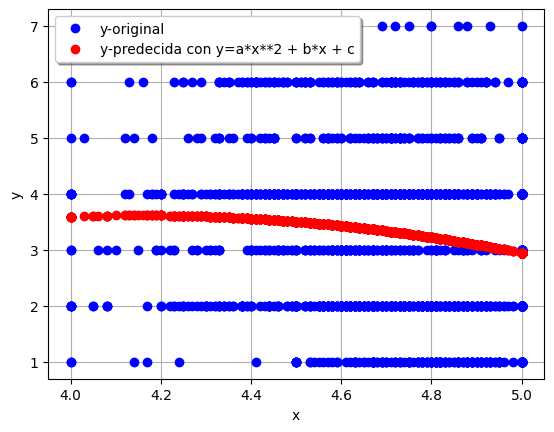

0.020334763267449207
0.14260001145669382


In [34]:
#MODELO 1
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['review_scores_value']]
Var_Dep= df['accommodates']

# Remove rows with NaN in either 'review_scores_value' or 'accommodates'
df_cleaned = df.dropna(subset=['review_scores_value', 'accommodates'])

x = df_cleaned[['review_scores_value']]
y = df_cleaned['accommodates']

def func(x, a, b, c):
    return a*x**2 + b*x + c

parametros, covs = curve_fit(func, df_cleaned['review_scores_value'], df_cleaned['accommodates'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_ACCOMODATES = abs(r2_score(y, y_pred))
R_ACCOMODATES = np.sqrt(R2_ACCOMODATES)
print(R2_ACCOMODATES)
print(R_ACCOMODATES)

/tmp/ipython-input-1340017240.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1340017240.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")


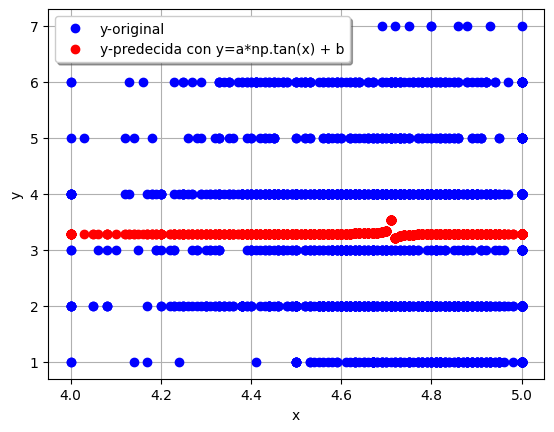

0.0007176314864814071
0.026788644730209983


In [38]:
#MODELO2 = FUNCIÓN TANGENCIAL
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['review_scores_value']]
Var_Dep= df['accommodates']

# Remove rows with NaN in either 'review_scores_value' or 'accommodates'
df_cleaned = df.dropna(subset=['review_scores_value', 'accommodates'])

x = df_cleaned[['review_scores_value']]
y = df_cleaned['accommodates']

def func(x, a, b):
    return a*np.tan(x) + b

parametros, covs = curve_fit(func, df_cleaned['review_scores_value'], df_cleaned['accommodates'], maxfev=5000)
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y=a*np.tan(x) + b", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

In [37]:
resultados = pd.DataFrame({
    "Modelo": ["Accomodates: Lineal", "Accomodates: Función Inversa", "Accomodates: Función Tangencial",],
    "R2": [R2, R2_ACCOMODATES, R21 ],
    "Correlación (r)": [R, R_ACCOMODATES, R1 ]
})
resultados

,Modelo,R2,Correlación (r)
0,Accomodates: Lineal,0.136231,0.369095
1,Accomodates: Función Inversa,0.020335,0.142600
2,Accomodates: Función Tangencial,0.000718,0.026789


5. REVIEWS PER MONTH

In [39]:
#CORRELACIÓN LINEAL
R2 = abs(df["reviews_per_month"].corr(df["maximum_nights"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.19063192136297175)

/tmp/ipython-input-317527934.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-317527934.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= a/b*x**2 + c*x ", color= "red")


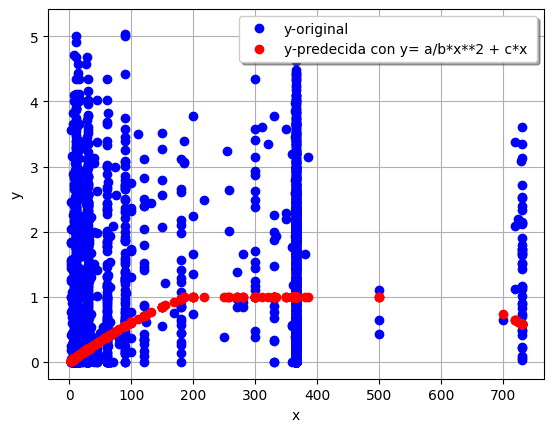

0.4713030452735272
0.6865151456985689


In [40]:
#MODELO 1 = FUNCIÓN POLINOMIAL INVERSA
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['maximum_nights']]
Var_Dep= df['reviews_per_month']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return a/b*x**2 + c*x
parametros, covs = curve_fit(func, df['maximum_nights'], df['reviews_per_month'])
y_pred = func(x, *parametros)
y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= a/b*x**2 + c*x ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

/tmp/ipython-input-3556842916.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs = curve_fit(func, df['maximum_nights'], df['reviews_per_month'])
/tmp/ipython-input-3556842916.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-3556842916.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a*x**4 ", color= "red")


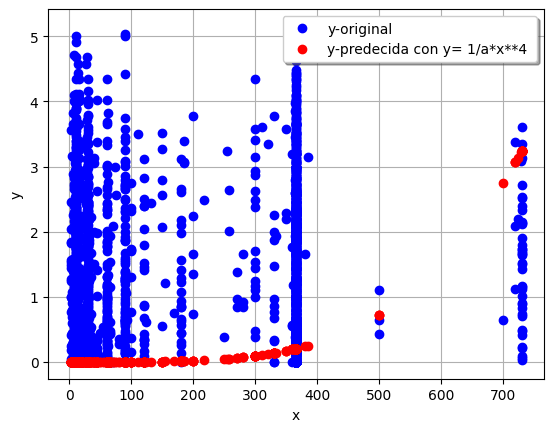

1.0408006228591962
1.020196364852961


In [41]:
#MODELO 2: FUNCIÓN POLINÓMICA DE GRADO 4
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['maximum_nights']]
Var_Dep= df['reviews_per_month']
x= Vars_Indep
y= Var_Dep
def func(x, a, b, c):
    return 1/a*x**4
parametros, covs = curve_fit(func, df['maximum_nights'], df['reviews_per_month'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= 1/a*x**4 ", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_REVIEWSPERMONTH = abs(r2_score(y, y_pred))
R_REVIEWSPERMONTH = np.sqrt(R2_REVIEWSPERMONTH)
print(R2_REVIEWSPERMONTH)
print(R_REVIEWSPERMONTH)

In [42]:
resultados = pd.DataFrame({
    "Modelo": ["Reviews per month: Lineal", "Reviews per month: Función Polinomial Inversa", "Reviews per month: Función Polinómica de Grado 4",],
    "R2": [R2, R21, R2_REVIEWSPERMONTH ],
    "Correlación (r)": [R, R1, R_REVIEWSPERMONTH ]
})
resultados

,Modelo,R2,Correlación (r)
0,Reviews per month: Lineal,0.036341,0.190632
1,Reviews per month: Función Polinomial Inversa,0.471303,0.686515
2,Reviews per month: Función Polinómica de Grado 4,1.040801,1.020196


6. PRICE

In [43]:
#CORRELACIÓN LINEAL
R2 = abs(df["reviews_per_month"].corr(df["price"]))
#Calculamos el coeficiente de correlación del modelo
R = np.sqrt(R2)
R

np.float64(0.34459343288320404)

/tmp/ipython-input-3576126915.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-3576126915.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= (a*x**2 + b)/ c*x**4", color= "red")


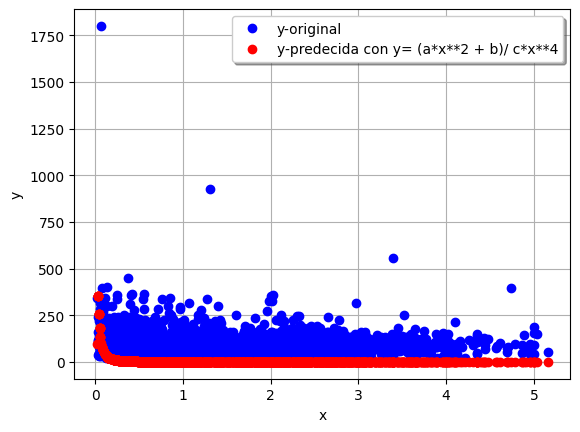

2.073975022883745
1.4401302103920135


In [45]:
#MODELO 1 = FUNCIÓN COCIENTE ENTRE POLINOMIOS DE GRADO 6
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['price']
x= Vars_Indep
y= Var_Dep

# Remove rows with NaN in either 'reviews_per_month' or 'price', and remove rows where 'reviews_per_month' is 0
df_cleaned = df.dropna(subset=['reviews_per_month', 'price'])
df_cleaned = df_cleaned[df_cleaned['reviews_per_month'] != 0]

x = df_cleaned[['reviews_per_month']]
y = df_cleaned['price']

def func(x, a, b, c):
    return (a*x**2 + b)/ (c*x**4) # Added parentheses for clarity and correctness

parametros, covs = curve_fit(func, x.squeeze(), y)
y_pred = func(x.squeeze(), *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= (a*x**2 + b)/ c*x**4", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R21 = abs(r2_score(y, y_pred))
R1 = np.sqrt(R21)
print(R21)
print(R1)

/tmp/ipython-input-1954876454.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y, 'bo', label="y-original", color= "blue")
/tmp/ipython-input-1954876454.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x, y_pred,'bo', label="y-predecida con y= a*x**2 + b*x + c", color= "red")


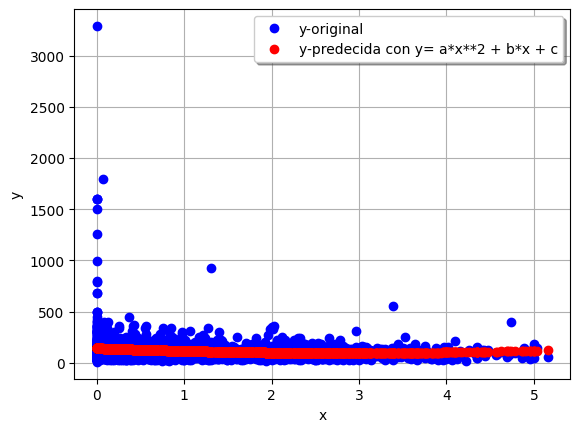

0.018465745253578025
0.1358887237911153


In [47]:
#MODELO 2: FUNCIÓN CUADRÁTICA
#Declaramos las variables dependientes e independientes para la regresión No lineal
Vars_Indep= df[['reviews_per_month']]
Var_Dep= df['price']
x= Vars_Indep
y= Var_Dep

# Remove rows with NaN in either 'reviews_per_month' or 'price'
df_cleaned = df.dropna(subset=['reviews_per_month', 'price'])

x = df_cleaned[['reviews_per_month']]
y = df_cleaned['price']

def func(x, a, b, c):
    return a*x**2 + b*x + c

parametros, covs = curve_fit(func, df_cleaned['reviews_per_month'], df_cleaned['price'])
y_pred = func(x, *parametros)
#y_pred = np.clip(y_pred, 0, 1)  # Ajusta 0 y 100 a tus límites

plt.plot(x, y, 'bo', label="y-original", color= "blue")
plt.plot(x, y_pred,'bo', label="y-predecida con y= a*x**2 + b*x + c", color= "red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_PRICE = abs(r2_score(y, y_pred))
R_PRICE = np.sqrt(R2_PRICE)
print(R2_PRICE)
print(R_PRICE)

In [48]:
resultados = pd.DataFrame({
    "Modelo": ["Price: Lineal", "Price: Función Cociente entre Polinomios Grado 6", "Price: Función Exponencial Decreciente",],
    "R2": [R2, R21, R2_PRICE ],
    "Correlación (r)": [R, R1, R_PRICE ]
})
resultados

,Modelo,R2,Correlación (r)
0,Price: Lineal,0.118745,0.344593
1,Price: Función Cociente entre Polinomios Grado 6,2.073975,1.440130
2,Price: Función Exponencial Decreciente,0.018466,0.135889
